Experiment 3 - CSE 3008 - L 23 + L 24

PART 1 OF 2 : IMPLEMENTATION OF DECISION TREE ON TITANIC.CSV

Name: Pratyush Mohanty

Roll no: 20BCI7073

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [8]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [9]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [11]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [14]:
len(X_train)

712

In [15]:
len(X_test)

179

In [22]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
model.score(X_test,y_test)

0.770949720670391

In [30]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 1.50
|   |--- feature_2 <= 9.50
|   |   |--- feature_3 <= 20.83
|   |   |   |--- class: 1
|   |   |--- feature_3 >  20.83
|   |   |   |--- feature_0 <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  2.50
|   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  9.50
|   |   |--- feature_3 <= 26.27
|   |   |   |--- feature_2 <= 14.00
|   |   |   |   |--- feature_3 <= 15.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  15.01
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  14.00
|   |   |   |   |--- feature_2 <= 32.50
|   |   |   |   |   |--- feature_2 <= 30.75
|   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |--- feature_2 <= 20.00
|   |   |   |   |   |   

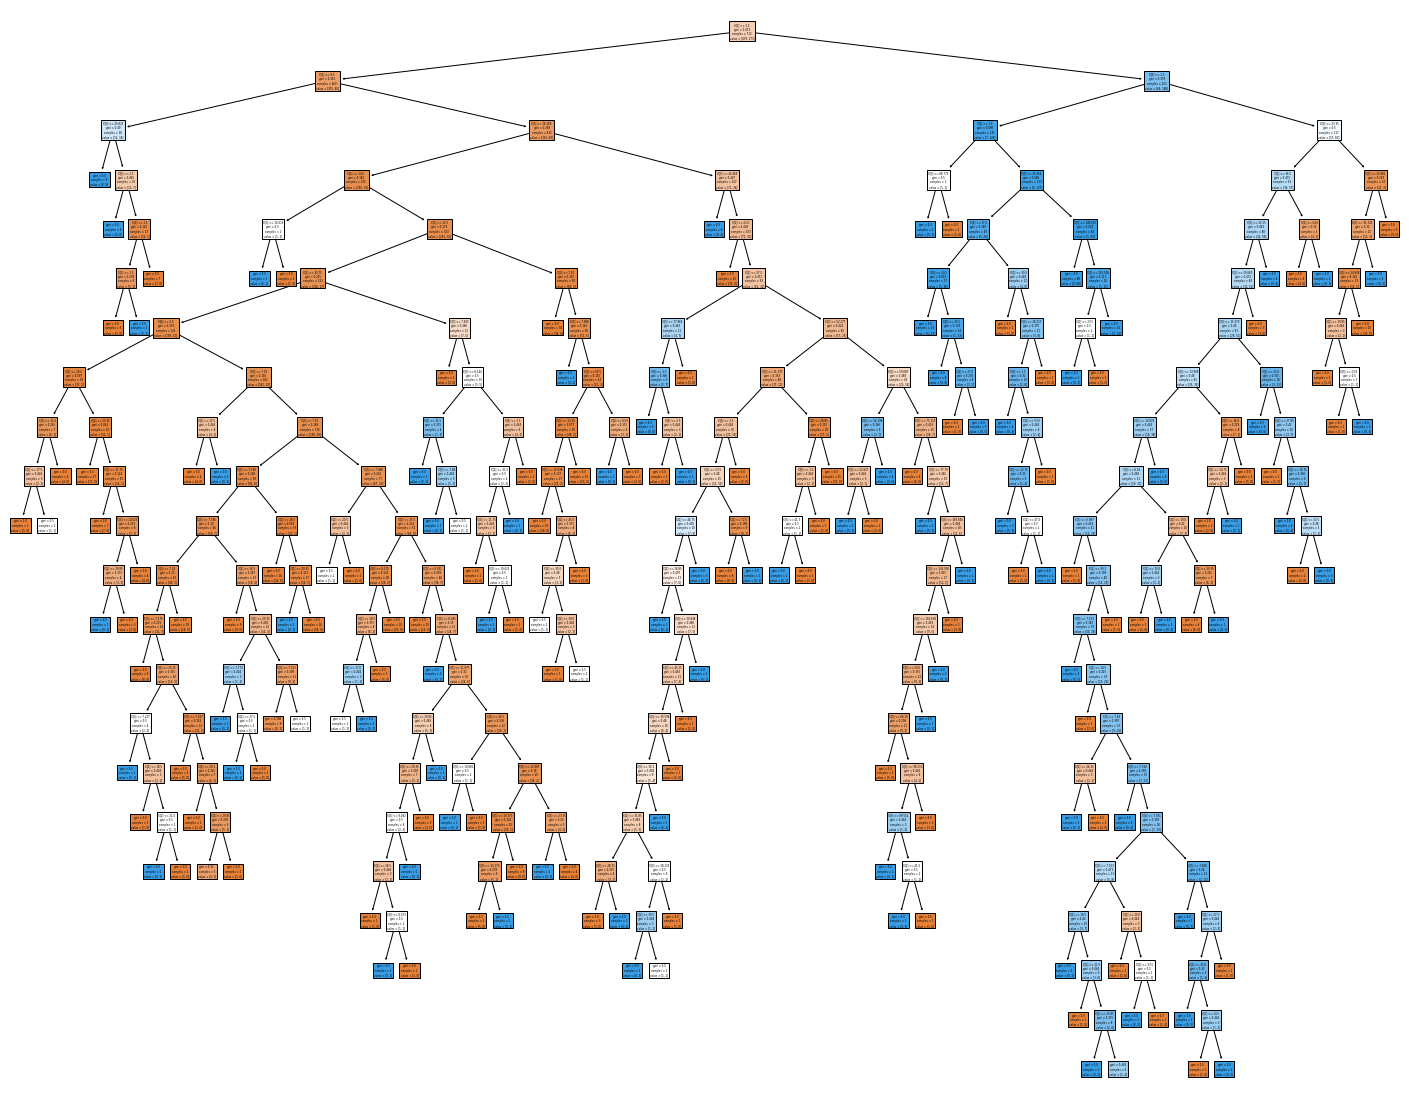

In [32]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   filled=True)